In [173]:
import sys
sys.path.append('../')
import python.edge as edge 
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

In [174]:
file= '../data/interim/spim2/c297.jpg'
img = cv2.imread(file,0)
app1 = cv2.imread(file)
app2 = app1.copy()
app3 = app1.copy()
filtered = cv2.bilateralFilter(img, 12,1050,1050)
edgeShape = edge.edge(filtered)

# Approach 1
Thresholding with lower limit **1** -> open(3x3) -> close(5x5) -> erode(5x5)
#TODO:  Automate the lower limit and the kernal size

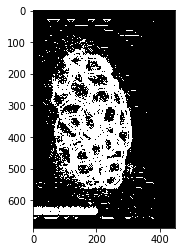

In [175]:
k, thres = cv2.threshold(edgeShape, 1, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB))

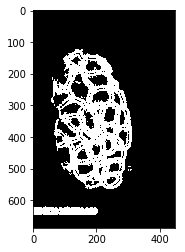

In [176]:
opening = cv2.morphologyEx(thres, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)),iterations=1)
plt.imshow(cv2.cvtColor(opening, cv2.COLOR_GRAY2RGB))

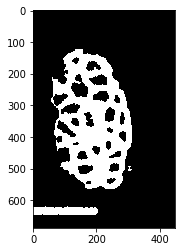

In [177]:
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)),iterations=2)
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_GRAY2RGB))

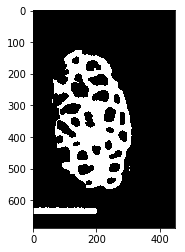

In [178]:
erode = cv2.erode(closing, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations=1)
plt.imshow(cv2.cvtColor(erode, cv2.COLOR_GRAY2RGB))

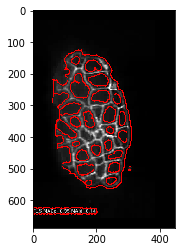

In [179]:
_ , contours, _ = cv2.findContours(erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(app1, contours, -1, (250, 0, 0),2)
plt.imshow(app1)

# Approach 2
Thresholding with lower limit **2** -> close(7x7) -> open(3x3)
#TODO:  Automate the lower limit and the kernal size 

Closing kernal of size 7 hinders the detection of small cells


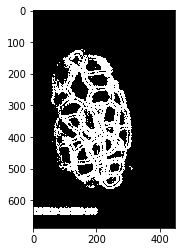

In [189]:
k, thres = cv2.threshold(edgeShape, 2, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB))

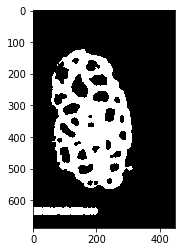

In [181]:
closing = cv2.morphologyEx(thres, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11)),iterations=1)
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_GRAY2RGB))

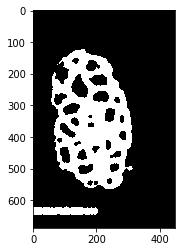

In [182]:
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)),iterations=1)
plt.imshow(cv2.cvtColor(opening, cv2.COLOR_GRAY2RGB))

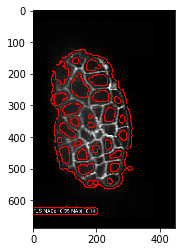

In [183]:
_ , contours, _ = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(app2, contours, -1, (250, 0, 0),2)
plt.imshow(app2)

# Approach 3

This is done using Canny Edge Detection

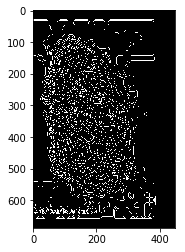

In [184]:
cannyEdge = edge.canny(filtered)
plt.imshow(cv2.cvtColor(cannyEdge, cv2.COLOR_GRAY2RGB))

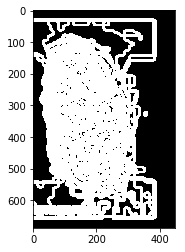

In [185]:
dilate = cv2.dilate(cannyEdge, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations=2)
plt.imshow(cv2.cvtColor(dilate, cv2.COLOR_GRAY2RGB))

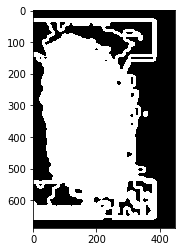

In [186]:
closing = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7)),iterations=1)
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_GRAY2RGB))

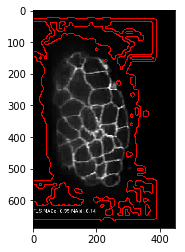

In [187]:
_ , contours, _ = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(app3, contours, -1, (250, 0, 0),2)
plt.imshow(app3)